In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import astropy.units as u
import scipy.integrate as integrate
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=700000, Om0=0.3)

### Merger rate 


The initial case, employing a constant merger rate model, involves a sole parameter denoted as $R_{0}$, reflecting a situation devoid of any redshift evolution. In contrast, the second model scenario introduces redshift-dependent variations in the merger rate and involves the consideration of four phenomenological parameters.
$R_{z}$=$R_{0}$$(1+z)^{\gamma}$$\frac{1+(1+z_{p})^{-(\gamma+k)}}{1+(\frac{1+z}{1+z_{p}})^{\gamma+k}}$

In [23]:
z=np.linspace(0,1,100)

z_p=1.9
R0=20e-9#Mpc^-3 yr^-1
gamma=2.7
kappa=2.9
A=1+(1+z_p)**(-5.6)   
B=1+((1+z)/(1+z_p))**5.6

For every merger rate $R(z)$ considered, the calculation involves determining the count of coalescing events per redshift unit and per unit observation time.
$\frac{dN_{GW}}{dzdt}$=$\frac{R(z)}{1+z}$$\frac{dV_{c}}{dz}$$(\theta_{c})$

where $\frac{dV_{c}}{dz}$$(\theta_{c})$ is the comoving volume at redshift $z$ and it depends on the cosmological parameter $(\theta_{c})$ 

In [24]:
comovingVolume= cosmo.comoving_volume(z)

In [25]:
vc=comovingVolume
vc

<Quantity [0.00000000e+00, 3.36806239e-07, 2.67596163e-06, 8.96900837e-06,
           2.11121645e-05, 4.09464851e-05, 7.02580757e-05, 1.10778357e-04,
           1.64184377e-04, 2.32099174e-04, 3.16092179e-04, 4.17679668e-04,
           5.38325252e-04, 6.79440403e-04, 8.42385026e-04, 1.02846806e-03,
           1.23894811e-03, 1.47503411e-03, 1.73788605e-03, 2.02861564e-03,
           2.34828711e-03, 2.69791796e-03, 3.07847974e-03, 3.49089889e-03,
           3.93605754e-03, 4.41479436e-03, 4.92790543e-03, 5.47614508e-03,
           6.06022681e-03, 6.68082413e-03, 7.33857147e-03, 8.03406510e-03,
           8.76786399e-03, 9.54049077e-03, 1.03524326e-02, 1.12041420e-02,
           1.20960379e-02, 1.30285064e-02, 1.40019019e-02, 1.50165477e-02,
           1.60727369e-02, 1.71707335e-02, 1.83107733e-02, 1.94930644e-02,
           2.07177883e-02, 2.19851008e-02, 2.32951327e-02, 2.46479906e-02,
           2.60437578e-02, 2.74824951e-02, 2.89642416e-02, 3.04890154e-02,
           3.20568141e-02

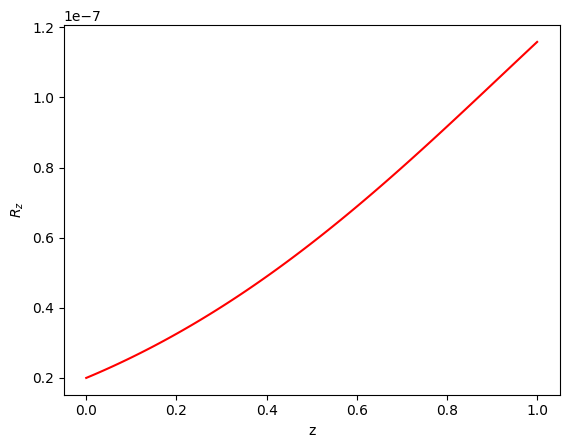

In [26]:
Rz=R0*(1+z)**2.7*(A/B)
plt.plot(z,Rz,color='r')
plt.xlabel('z')
plt.ylabel('$R_{z}$')
plt.savefig('Rz.png',dpi=300)
plt.show()

In [27]:
dNdzdt=(Rz/(1+z))*vc.value

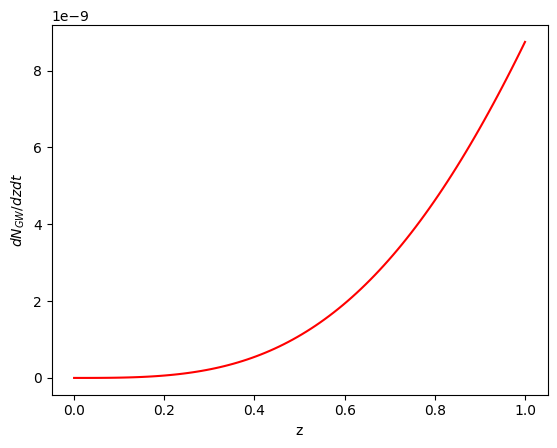

In [28]:
plt.plot(z,dNdzdt,'r')
plt.xlabel('z')
plt.ylabel('$dN_{GW}/dzdt$')
plt.savefig('dNgw.png',dpi=300)
plt.show()